In [1]:
# Importing Libraries
from bs4 import BeautifulSoup as bs
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import time
import requests
import random
import nltk
#nltk.download('punkt')
import gensim

In [2]:
# Accessing the Website with requests
page = requests.get("https://www.gov.uk/government/news/uk-mongolia-communique-may-2022")

print(page)

<Response [200]>


In [3]:
# Getting the webpage's content in pure html
soup = bs(page.content, 'lxml')

soup

<!DOCTYPE html>
<!--[if lt IE 9]><html class="lte-ie8 govuk-template" lang="en"><![endif]--><!--[if gt IE 8]><!--><html class="govuk-template" lang="en">
<!--<![endif]-->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="" property="og:image:alt"/>
<meta content="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/image_data/file/150728/s960_Milling_Mongolia.png" property="og:image"/>
<meta content="The 14th UK-Mongolia round table meeting took place on 12 May 2022 in Ulaanbaatar." property="og:description"/>
<meta content="UK-Mongolia communique: May 2022" property="og:title"/>
<meta content="https://www.gov.uk/government/news/uk-mongolia-communique-may-2022" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="GOV.UK" property="og:site_name"/>
<meta content="" name="twitter:image:alt"/>
<meta content="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/image_data/file/150

In [4]:
# clean the html to get text only
info = soup.find_all("div", {"class":"govspeak"})[0]
#print(info)
text = info.get_text()
print(text)


The delegation of Mongolia was headed by HE Mr. Enkh-Amgalan Luvsantseren, Minister of Education and Science while the delegation of the United Kingdom (UK) was headed by The Rt Hon Amanda Milling MP, Minister of State for Asia and the Middle East at the Foreign, Commonwealth and Development Office.
Ministers recalled that Mongolia and the UK established diplomatic relations in 1963. They welcomed the continued progress in the Mongolia-UK bilateral relationship, reaffirmed their commitment to broaden this further and set out their desire to negotiate a Partnership and Cooperation Agreement, to coincide with the 60th anniversary of diplomatic relations in 2023.
Trade, Economic, and Investment cooperation
Ministers welcomed the inclusion of Mongolia in the UK’s “Enhanced Framework” Trade Preference Arrangements from 1 January 2021 and expressed their intention to engage actively to facilitate bilateral trade and economic cooperation.
They also welcomed the recent first visit of the UK P

In [5]:
#writing text to txt file
#with open('QIA_files/s1.txt', 'w+') as f:
    #f.write(text)
    


In [6]:
print("The Word count for this article is",len(text.split()))

The Word count for this article is 487


In [7]:
tokens = [t for t in text.split()]
print(tokens)

['The', 'delegation', 'of', 'Mongolia', 'was', 'headed', 'by', 'HE', 'Mr.', 'Enkh-Amgalan', 'Luvsantseren,', 'Minister', 'of', 'Education', 'and', 'Science', 'while', 'the', 'delegation', 'of', 'the', 'United', 'Kingdom', '(UK)', 'was', 'headed', 'by', 'The', 'Rt', 'Hon', 'Amanda', 'Milling', 'MP,', 'Minister', 'of', 'State', 'for', 'Asia', 'and', 'the', 'Middle', 'East', 'at', 'the', 'Foreign,', 'Commonwealth', 'and', 'Development', 'Office.', 'Ministers', 'recalled', 'that', 'Mongolia', 'and', 'the', 'UK', 'established', 'diplomatic', 'relations', 'in', '1963.', 'They', 'welcomed', 'the', 'continued', 'progress', 'in', 'the', 'Mongolia-UK', 'bilateral', 'relationship,', 'reaffirmed', 'their', 'commitment', 'to', 'broaden', 'this', 'further', 'and', 'set', 'out', 'their', 'desire', 'to', 'negotiate', 'a', 'Partnership', 'and', 'Cooperation', 'Agreement,', 'to', 'coincide', 'with', 'the', '60th', 'anniversary', 'of', 'diplomatic', 'relations', 'in', '2023.', 'Trade,', 'Economic,', 'and

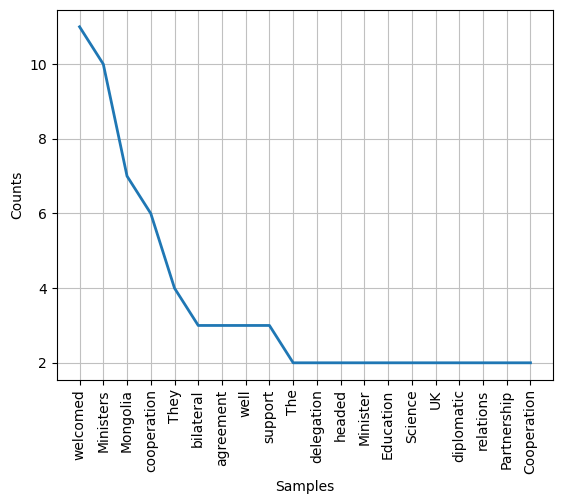

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
#frequency analysis 
#nltk.download()
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [9]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
#import en_core_web_sm
# Summary (0.5% of the original content).
ratio = 0.05
summ_per = summarize(text, ratio)
print("\u0332".join("Percent summary: "+ str(ratio*10) + "%"))
print("\n")
print(summ_per)
print("\n")
    
# Summary (200 words)
word_count = 200
summ_words = summarize(text, word_count)
print("\u0332".join("Word count summary: " + str(word_count) + " words"))
print("\n")
print(summ_words)

ModuleNotFoundError: No module named 'gensim.summarization'

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(text)
print(sentences)

In [ ]:

#nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['sentences']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(sentences, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['sentences'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
#parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news

In [ ]:
# multiple pages of content
#urls = [f"https://www.gov.uk/search/news-and-communications?page={i}&parent=%2Finternational%2Fforeign-affairs&topic=d6dba75a-42bd-4e1e-984c-2bddb6b41951/" for i in range(1,30)]
#urls
for i in range(1,3):
    page2 = requests.get(f"https://www.gov.uk/search/news-and-communications?page={i}&parent=%2Finternational%2Fforeign-affairs&topic=d6dba75a-42bd-4e1e-984c-2bddb6b41951/")
    soup2 = bs(page2.content, 'lxml')
    info2 = soup2.find_all("div", {"class":"finder-results js-finder-results"})
    #info3 = soup2.find_all("ul", {"class":"gem-document-list--no-underline"})
    #info4 = soup2.find_all("a", {"class":"gem-c-document-list__item-title.govuk-link"})#.find("href")
                           
soup2
print(info2)

   



In [ ]:
#showing all hyperlinks on page
getpage_soup= bs(page2.content, 'html.parser')
info4 = getpage_soup.find_all("a", {"class":"gem-c-document-list__item-title govuk-link"})
print(info4)
#all_links= getpage_soup.find_all('a')

#for link in all_links:
    #print (link)
    


In [ ]:
for a_tag in getpage_soup.findAll("a"):
    href = a_tag.attrs.get("href")
    if href == "" or href is None:
        # href empty tag
        continue
print(href)